# Exercise with Natural Language Processing

For todays exersice we will be doing two things.  The first is to build the same model with the same data that we did in the lecture, the second will be to build a new model with new data. 

## PART 1: 
- 20 Newsgroups Corpus


## PART 2:
- Republican vs Democrat Tweet Classifier

In [1]:
# Import pandas for data handling
import pandas as pd

# NLTK is our Natural-Language-Took-Kit
import nltk
from nltk.corpus import stopwords
from nltk import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet

# Libraries for helping us with strings
import string
# Regular Expression Library
import re

# Import our text vectorizers
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer


# Import our classifiers
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier


# Import some ML helper function
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report


# Import our metrics to evaluate our model
from sklearn import metrics
from sklearn.metrics import classification_report


# Library for plotting
import matplotlib.pyplot as plt
import seaborn as sns

# You may need to download these from nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
stopwords = stopwords.words('english')

[nltk_data] Error loading stopwords: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     unable to get local issuer certificate (_ssl.c:1129)>
[nltk_data] Error loading punkt: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     unable to get local issuer certificate (_ssl.c:1129)>
[nltk_data] Error loading wordnet: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     unable to get local issuer certificate (_ssl.c:1129)>


## Load and display data.
1. Load the 20-newsgroups.csv data into a dataframe.
1. Print the shape
1. Inspect / remove nulls and duplicates
1. Find class balances, print out how many of each topic_category there are.

In [3]:
# 1. Load the 20-newsgroups.csv data into a dataframe.
# 2. Print the shape
df = pd.read_csv('data/20-newsgroups.csv')
df.shape

(11314, 4)

In [7]:
# 3. Inspect / remove nulls and duplicates
print(df.isnull().sum())
print(df.duplicated().sum())

id                0
message           0
topic             0
topic_category    0
dtype: int64
0


In [8]:
# 4. Find class balances, print out how many of each topic_category there are.
df.topic_category.value_counts()

rec.sport.hockey            600
soc.religion.christian      599
rec.motorcycles             598
rec.sport.baseball          597
sci.crypt                   595
rec.autos                   594
sci.med                     594
comp.windows.x              593
sci.space                   593
comp.os.ms-windows.misc     591
sci.electronics             591
comp.sys.ibm.pc.hardware    590
misc.forsale                585
comp.graphics               584
comp.sys.mac.hardware       578
talk.politics.mideast       564
talk.politics.guns          546
alt.atheism                 480
talk.politics.misc          465
talk.religion.misc          377
Name: topic_category, dtype: int64

# Text Pre-Processing 
(aka Feature engineering)
1. Make a function that makes all text lowercase.
    * Do a sanity check by feeding in a test sentence into the function. 
    
    
2. Make a function that removes all punctuation. 
    * Do a sanity check by feeding in a test sentence into the function. 
    
    
3. Make a function that removes all stopwords.
    * Do a sanity check by feeding in a test sentence into the function. 
    
    
4. EXTRA CREDIT (This step only): Make a function that stemms all words. 


5. Mandatory: Make a pipeline function that applys all the text processing functions you just built.
    * Do a sanity check by feeding in a test sentence into the pipeline. 
    
    
    
6. Mandatory: Use `df['message_clean'] = df[column].apply(???)` and apply the text pipeline to your text data column. 

In [9]:
# 1. Make a function that makes all text lowercase.
def lower(val):
    return val.lower()
test_string = 'This is A SENTENCE with LOTS OF CAPS.'
print(lower(test_string))

this is a sentence with lots of caps.


In [10]:
# 2. Make a function that removes all punctuation. 

def removePunc(val):
    return re.sub(r'[^\w\s]','',val)
test_string = 'This is a sentence! 50 With lots of punctuation??? & other #things.'
print(removePunc(test_string))

This is a sentence 50 With lots of punctuation  other things


In [12]:
# 3. Make a function that removes all stopwords.
def removeStopWords(val):
    words = word_tokenize(val)
    valid = []
    for word in words:
        if word not in stopwords:
            valid.append(word)
    
    val = ' '.join(valid)
    return val
test_string = 'This is a sentence! With some different stopwords i have added in here.'
print(removeStopWords(test_string))

This sentence ! With different stopwords added .


In [13]:
# 4. EXTRA CREDIT: Make a function that stemms all words. 
def stemWord(val):
    porter = PorterStemmer()
    words = word_tokenize(val)
    valid = []
    for word in words:
        stemmed = porter.stem(word)
        valid.append(stemmed)
    val = ' '.join(valid)
    return val
test_string = 'I played and started playing with players and we all love to play with plays'

print(stemWord(test_string))

i play and start play with player and we all love to play with play


In [14]:
# 5. MANDATORY: Make a pipeline function that applys all the text processing functions you just built.
def text_pipeline(val):
    val = lower(val)
    val = removePunc(val)
    #val = removeStopWords(val)
    val = stemWord(val)
    return val

test_string = 'I played and started playing with players and we all love to play with plays'
print(text_pipeline(test_string))

play start play player love play play


In [15]:
# 6. Mandatory: Use `df[column].apply(???)` and apply the text pipeline to your text data column. 
df['message_clean'] = df['message'].apply(text_pipeline)

In [16]:
df.head()

,id,message,topic,topic_category,message_clean
0,0,From: lerxst@wam.umd.edu (where's my thing)\r\...,7,rec.autos,lerxstwamumdedu where thing subject car nntppo...
1,1,From: guykuo@carson.u.washington.edu (Guy Kuo)...,4,comp.sys.mac.hardware,guykuocarsonuwashingtonedu guy kuo subject si ...
2,2,From: twillis@ec.ecn.purdue.edu (Thomas E Will...,4,comp.sys.mac.hardware,twillisececnpurdueedu thoma e willi subject pb...
3,3,From: jgreen@amber (Joe Green)\r\nSubject: Re:...,1,comp.graphics,jgreenamb joe green subject weitek p9000 organ...
4,4,From: jcm@head-cfa.harvard.edu (Jonathan McDow...,14,sci.space,jcmheadcfaharvardedu jonathan mcdowel subject ...


# Text Vectorization

1. Define your `X` and `y` data. 


2. Initialize a vectorizer (you can use TFIDF or BOW, it is your choice).
    * Do you want to use n-grams..?


3. Fit your vectorizer using your X data.
    * Remember, this process happens IN PLACE.


4. Transform your X data using your fitted vectorizer. 
    * `X = vectorizer.???`



5. Print the shape of your X.  How many features (aka columns) do you have?

In [17]:
# 1. Define your `X` and `y` data. 
X = df['message_clean'].values
y = df['topic_category'].values

In [18]:
# 2. Initialize a vectorizer (you can use TFIDF or BOW, it is your choice).
vectorizer = TfidfVectorizer()
vectorizer.fit(X)
X = vectorizer.transform(X)
print(X.shape, type(X))


(11314, 119708) <class 'scipy.sparse.csr.csr_matrix'>


# Split your data into Training and Testing data. 

In [19]:
# Split our data into testing and training like always. 
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=45,test_size=0.2)

___
# Build and Train Model
Use Multinomial Naive Bayes to classify these documents. 

1. Initalize an empty model. 
2. Fit the model with our training data.


Experiment with different alphas.  Use the alpha gives you the best result.

EXTRA CREDIT:  Use grid search to programmatically do this for you. 

In [20]:
# 1. Initalize an empty model. 

model = MultinomialNB(alpha=.05)


In [21]:
# Fit our model with our training data.
model.fit(X_train, y_train)



MultinomialNB(alpha=0.05)

# Evaluate the model.

1. Make new predicitions using our test data. 
2. Print the accuracy of the model. 
3. Print the confusion matrix of our predictions. 
4. Using `classification_report` print the evaluation results for all the classes. 



In [22]:
# 1. Make new predictions of our testing data. 
y_pred = model.predict(X_test)



In [23]:
# 2. Print the accuracy of the model. 
accuracy = model.score(X_test,y_test)

print("Model Accuracy: %f" % accuracy)

Model Accuracy: 0.901016


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


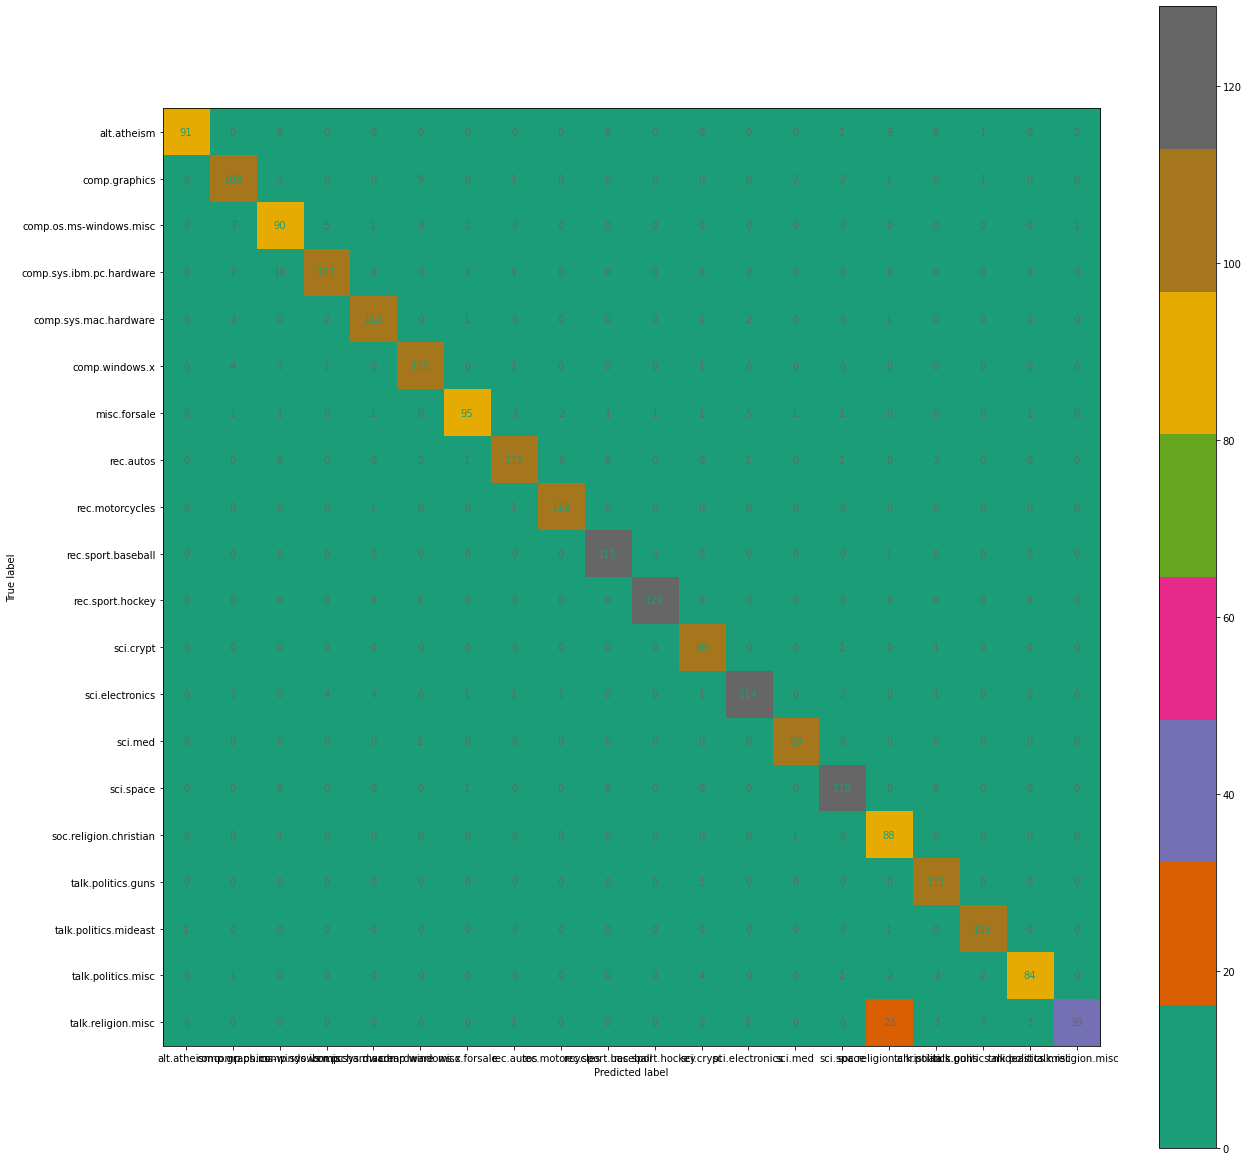

In [24]:
# 3. Plot the confusion matrix of our predictions

fig, ax = plt.subplots(figsize=(21,21))

disp = plot_confusion_matrix(model, X_test,y_test, display_labels=model.classes_, cmap = plt.cm.Dark2, ax = ax)

In [25]:
# 4. Using `classification_report` print the evaluation results for all the classes. 
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred,target_names=model.classes_))


                          precision    recall  f1-score   support

             alt.atheism       0.93      0.88      0.90       104
           comp.graphics       0.85      0.81      0.83       133
 comp.os.ms-windows.misc       0.83      0.83      0.83       108
comp.sys.ibm.pc.hardware       0.82      0.81      0.81       132
   comp.sys.mac.hardware       0.90      0.92      0.91       122
          comp.windows.x       0.87      0.92      0.90       121
            misc.forsale       0.91      0.79      0.85       120
               rec.autos       0.93      0.90      0.91       124
         rec.motorcycles       0.93      0.98      0.95       114
      rec.sport.baseball       0.99      0.97      0.98       119
        rec.sport.hockey       0.97      0.99      0.98       130
               sci.crypt       0.92      0.98      0.95       101
         sci.electronics       0.91      0.87      0.89       131
                 sci.med       0.96      0.99      0.98       100
         

# Manual predicition
Write a new sentence that you think will be classified as talk.politics.guns. 
1. Apply the text pipeline to your sentence
2. Transform your cleaned text using the `X = vectorizer.transform([your_text])`
    * Note, the `transform` function accepts a list and not a individual string.
3. Use the model to predict your new `X`. 
4. Print the prediction

In [29]:
my_sentence = "Many Americans in the Democratic party believe gun control is a good thing."

# 1. Apply the text pipeline to your sentence
my_sentence = text_pipeline(my_sentence)
# 2. Transform your cleaned text using the `X = vectorizer.transform([your_text])`\
X_test_New = vectorizer.transform([my_sentence])
# 3. Use the model to predict your new `X`. 
y_pred_New = model.predict(X_test_New)
# 4. Print the prediction
pp = model.predict_proba(X_test_New)
for c, p in zip(model.classes_, pp.round(3)[0]):
    print(c, p)

alt.atheism 0.017
comp.graphics 0.001
comp.os.ms-windows.misc 0.002
comp.sys.ibm.pc.hardware 0.003
comp.sys.mac.hardware 0.002
comp.windows.x 0.0
misc.forsale 0.004
rec.autos 0.01
rec.motorcycles 0.004
rec.sport.baseball 0.001
rec.sport.hockey 0.003
sci.crypt 0.161
sci.electronics 0.004
sci.med 0.007
sci.space 0.005
soc.religion.christian 0.007
talk.politics.guns 0.559
talk.politics.mideast 0.064
talk.politics.misc 0.144
talk.religion.misc 0.004


___
# PART 2: Twitter Data
This part of the exercise is un-guided on purpose.  

Using the `dem-vs-rep-tweets.csv` build a classifier to determine if a tweet was written by a democrat or republican. 

Can you get an f1-score higher than %82

Because tweets are so small already, try not removing stopwords....

In [35]:
# 1. Load the dem-vs-rep-tweets data into a dataframe.
# 2. Print the shape
df = pd.read_csv('data/dem-vs-rep-tweets.csv')
print(df.shape)
print(df.isnull().sum())

df = df.drop_duplicates()
print(df.duplicated().sum())

df.head()

(86460, 3)
Party     0
Handle    0
Tweet     0
dtype: int64
0


,Party,Handle,Tweet
0,Democrat,RepDarrenSoto,"Today, Senate Dems vote to #SaveTheInternet. P..."
1,Democrat,RepDarrenSoto,RT @WinterHavenSun: Winter Haven resident / Al...
2,Democrat,RepDarrenSoto,RT @NBCLatino: .@RepDarrenSoto noted that Hurr...
3,Democrat,RepDarrenSoto,RT @NALCABPolicy: Meeting with @RepDarrenSoto ...
4,Democrat,RepDarrenSoto,RT @Vegalteno: Hurricane season starts on June...
